In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import awkward._v2 as ak   # Awkward Array 2.0, will be officially released in December 2022

# Exercise 4: compute path lengths in each taxi trip

In [11]:
taxi = ak.from_parquet("https://pivarski-princeton.s3.amazonaws.com/chicago-taxi.parquet", row_groups=[0])
taxi.show()

[[{trip: {sec: 60, km: 0, ...}, payment: {...}, company: ..., ...}, ..., {...}],
 [{trip: {sec: 180, km: 0, ...}, payment: {...}, company: ..., ...}, ...],
 [{trip: {sec: 586, km: 0.966, ...}, payment: {...}, company: ..., ...}, ...],
 [{trip: {sec: 420, km: 1.29, ...}, payment: {...}, company: ..., ...}, ...],
 [{trip: {sec: 0, km: 0, ...}, payment: {...}, company: ..., ...}, ..., {...}],
 [{trip: {sec: 2.64e+03, km: ..., ...}, payment: {...}, ...}, ..., {...}],
 [{trip: {sec: 2.3e+03, km: 29.1, ...}, payment: {...}, ...}, ..., {...}],
 [],
 [{trip: {sec: 480, km: 2.74, ...}, payment: {...}, company: ..., ...}, ...],
 [{trip: {sec: 0, km: 0, ...}, payment: {...}, company: ..., ...}, ..., {...}],
 ...,
 [{trip: {sec: 240, km: 0.966, ...}, payment: {...}, company: ..., ...}, ...],
 [{trip: {sec: 0, km: 0, ...}, payment: {...}, company: ..., ...}, ..., {...}],
 [{trip: {sec: 69, km: 0, ...}, payment: {...}, company: ..., ...}, ..., {...}],
 [{trip: {sec: 0, km: 0, ...}, payment: {...}, c

In [12]:
taxi.type.show()

353 * var * {
    trip: {
        sec: ?float32,
        km: ?float32,
        begin: {
            lon: ?float64,
            lat: ?float64,
            time: ?datetime64[ms]
        },
        end: {
            lon: ?float64,
            lat: ?float64,
            time: ?datetime64[ms]
        },
        path: var * {
            londiff: float32,
            latdiff: float32
        }
    },
    payment: {
        fare: ?float32,
        tips: ?float32,
        total: ?float32,
        type: string
    },
    company: string
}


In [22]:
taxi[1].show()

[{trip: {sec: 180, km: 0, ...}, payment: {fare: ..., ...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 1.02e+03, km: 0, ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 ...,
 {trip: {sec: 1.68e+03, km: 0, ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 1.26e+03, km: 0, ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 1.98e+03, km: 0, ...}, payment: {...}, company: ..., ...},

In [23]:
taxi[1].trip.show()

[{sec: 180, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 1.02e+03, km: 0, begin: {lon: -87.6, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: None, ...}, end: {...}, path: []},
 {sec: 0, km: 0, begin: {lon: None, ...}, end: {...}, path: []},
 ...,
 {sec: 1.68e+03, km: 0, begin: {lon: -87.9, ...}, end: {...}, path: [...]},
 {sec: 1.26e+03, km: 0, begin: {lon: -87.9, ...}, end: {...}, path: []},
 {sec: 1.98e+03, km: 0, begin: {lon: -87.9, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 1.

In [25]:
taxi[1].trip.path.show()

[[{londiff: -2.41e-05, latdiff: -3.03e-07}, {londiff: -2.41e-05, ...}],
 [{londiff: -2.41e-05, latdiff: -3.03e-07}, {londiff: -2.41e-05, ...}],
 [{londiff: -2.41e-05, latdiff: -3.03e-07}, {londiff: -2.41e-05, ...}],
 [{londiff: -3.74e-05, latdiff: -1.96e-07}, {londiff: -3.74e-05, ...}],
 [{londiff: -2.41e-05, latdiff: -3.03e-07}, {londiff: -2.41e-05, ...}],
 [{londiff: -2.41e-05, latdiff: -3.03e-07}, {londiff: -2.41e-05, ...}],
 [{londiff: 3.43e-07, latdiff: 1.94e-05}, {londiff: 3.43e-07, ...}],
 [{londiff: -6.51e-06, latdiff: 0.000305}, {...}, ..., {londiff: 0.012, ...}],
 [],
 [],
 ...,
 [{londiff: 0.00768, latdiff: -0.001}, {...}, ..., {londiff: 0.219, ...}],
 [],
 [{londiff: 0.00768, latdiff: -0.001}, {...}, ..., {londiff: 0.237, ...}],
 [{londiff: -0.000231, latdiff: -3.99e-06}, {londiff: -0.000231, ...}],
 [{londiff: -8.79e-05, latdiff: 0.000336}, {...}, ..., {londiff: -0.0241, ...}],
 [{londiff: 0.000239, latdiff: 1.81e-06}, {...}, ..., {londiff: 0.000128, ...}],
 [{londiff: 0.0

In [35]:
(
    taxi[1].trip.path.londiff,
    taxi[1].trip.path.latdiff,
)

(<Array [[-2.41e-05, -2.41e-05], [...], ..., []] type='499 * var * float32'>,
 <Array [[-3.03e-07, -3.03e-07], [...], ..., []] type='499 * var * float32'>)

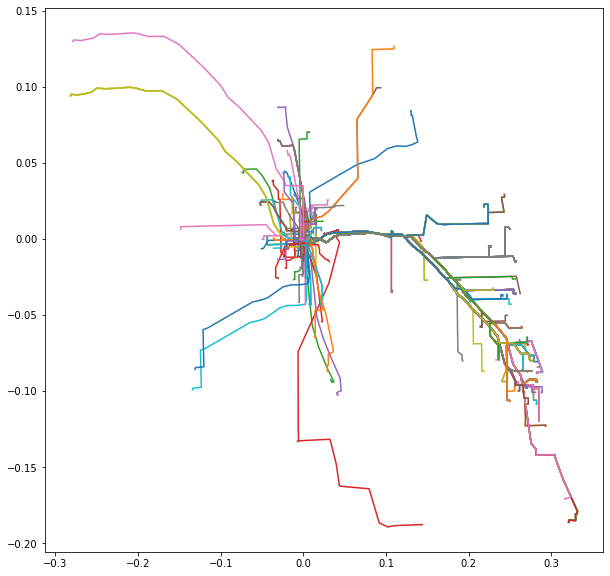

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for ride in taxi[1]:
    ax.plot(ride.trip.path.londiff, ride.trip.path.latdiff)

In [36]:
(
    taxi[1].trip.path.londiff + taxi[1].trip.begin.lon,
    taxi[1].trip.path.latdiff + taxi[1].trip.begin.lat,
)

(<Array [[-87.7, -87.7], [-87.7, ...], ..., []] type='499 * option[var * flo...'>,
 <Array [[41.9, 41.9], [41.9, ...], ..., []] type='499 * option[var * float64]'>)

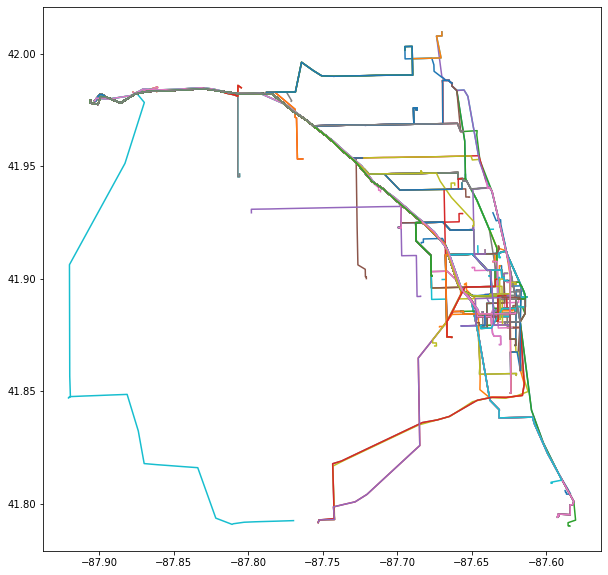

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for ride in taxi[1]:
    if ride.trip.begin.lon is not None and ride.trip.begin.lat is not None:
        longitude = ride.trip.begin.lon + ride.trip.path.londiff
        latitude = ride.trip.begin.lat + ride.trip.path.latdiff
        ax.plot(longitude, latitude)

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3f/USA_Chicago_location_map.svg" width="500">

In [37]:
LONGITUDE, LATITUDE = -87.66178320769112, 41.896777262111726
LON_TO_KM, LAT_TO_KM = 82.98452409203695, 111.07127961503745

In [38]:
(
    (taxi[1].trip.path.londiff + taxi[1].trip.begin.lon - LONGITUDE) * LON_TO_KM,
    (taxi[1].trip.path.latdiff + taxi[1].trip.begin.lat - LATITUDE) * LAT_TO_KM,
)

(<Array [[-4.63, -4.63], [-4.63, ...], ..., []] type='499 * option[var * flo...'>,
 <Array [[5.12, 5.12], [5.12, ...], ..., []] type='499 * option[var * float64]'>)

In [39]:
(
    taxi[1].trip.path.londiff * LON_TO_KM,
    taxi[1].trip.path.latdiff * LAT_TO_KM,
)

(<Array [[-0.002, -0.002], [-0.002, ...], ..., []] type='499 * var * float32'>,
 <Array [[-3.37e-05, -3.37e-05], [...], ..., []] type='499 * var * float32'>)

In [41]:
km_east, km_north = (
    (taxi.trip.path.londiff + taxi.trip.begin.lon - LONGITUDE) * LON_TO_KM,
    (taxi.trip.path.latdiff + taxi.trip.begin.lat - LATITUDE) * LAT_TO_KM,
)
km_east, km_north

(<Array [[[-4.63, -4.63], ..., [...]], ...] type='353 * var * option[var * f...'>,
 <Array [[[5.12, 5.12], ..., [10, ...]], ...] type='353 * var * option[var *...'>)

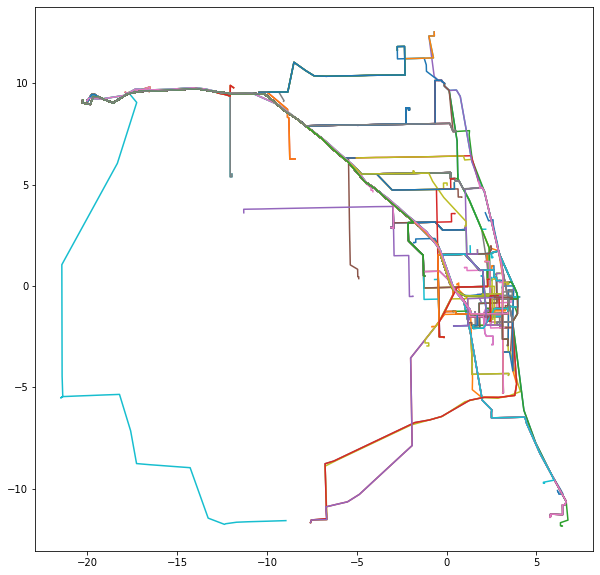

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for x, y in zip(km_east[1], km_north[1]):
    if x is not None and y is not None:
        ax.plot(x, y)

In [49]:
(
    ak.num(km_east[1]),
    ak.num(km_north[1]),
)

(<Array [2, 2, 2, 2, 2, 2, 2, ..., 38, 2, 12, 7, 10, 36, 0] type='499 * ?int64'>,
 <Array [2, 2, 2, 2, 2, 2, 2, ..., 38, 2, 12, 7, 10, 36, 0] type='499 * ?int64'>)

In [50]:
ak.argmax(ak.num(km_east[1]))

208

In [52]:
example_east, example_north = (
    km_east[1, 208],
    km_north[1, 208],
)
example_east, example_north

(<Array [-20.3, -20.3, -20.3, -20.3, ..., 5.82, 5.75, 5.75] type='54 * float64'>,
 <Array [9.16, 9.14, 9.1, 9.03, ..., -11.4, -11.4, -11.4] type='54 * float64'>)

In [57]:
fenceposts = np.array([1.1, 2.2, 3.3, 4.4, 5.5, 10, 20, 30])
fenceposts

array([ 1.1,  2.2,  3.3,  4.4,  5.5, 10. , 20. , 30. ])

In [59]:
(
    fenceposts[1:],
    fenceposts[:-1],
)

(array([ 2.2,  3.3,  4.4,  5.5, 10. , 20. , 30. ]),
 array([ 1.1,  2.2,  3.3,  4.4,  5.5, 10. , 20. ]))

In [60]:
fenceposts[1:] - fenceposts[:-1]

array([ 1.1,  1.1,  1.1,  1.1,  4.5, 10. , 10. ])

In [61]:
example_east[1:] - example_east[:-1]

<Array [-0.00282, 0.00747, -0.0139, ..., -0.0675, 0.000497] type='53 * float64'>

$$\Delta r = \sqrt{\Delta x^2 + \Delta y^2}$$

In [63]:
(
    (example_east[1:] - example_east[:-1])**2,
    (example_north[1:] - example_north[:-1])**2,
)

(<Array [7.96e-06, 5.58e-05, ..., 0.00455, 2.47e-07] type='53 * float64'>,
 <Array [0.000293, 0.00181, 0.00536, ..., 9.99e-07, 0.0019] type='53 * float64'>)

In [64]:
np.sqrt((example_east[1:] - example_east[:-1])**2 + (example_north[1:] - example_north[:-1])**2)

<Array [0.0173, 0.0432, 0.0745, ..., 0.0675, 0.0435] type='53 * float64'>

In [65]:
ak.sum(np.sqrt((example_east[1:] - example_east[:-1])**2 + (example_north[1:] - example_north[:-1])**2), axis=-1)

40.56261108101097

<img src="../img/length-by-segment.svg" width="500">